***
***
***

<br><h2>Apprentice Chef - Classification Modeling</h2>
<h4>Sheethal Melnarse</h4>

***
***
***

<h3>Context</h3>

</n> Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home.
Developed for the busy professional that has little to no skills in the kitchen, they offer a wide
selection of daily-prepared gourmet meals delivered directly to your door.

Apprentice Chef, Inc. has launched a new service called Halfway There, a cross-selling promotion where subscribers receive a half bottle of wine from a local California vineyard every Wednesday (halfway through the work week) to diversify their revenue.

<h3>Objective</h3>

</n> Determining the important features from the given dataset and building a machine learning model to predict whether the customer will subscribe to the service.

***

<h4>Load Data</h4>

</n>Let's start by importing libraries and loading the data. We can take a look at the features and try to understand them.


In [197]:
# importing libraries
import numpy as np
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
import sklearn.model_selection 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
import pydotplus 
import random as rand # random number generation


# loading data
file = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)

# Renaming the file name
my_chef = original_df


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
my_chef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


***
<h3>Feature Engineering</h3>
    

***

Using two step process, we can split the emails into domain names and we can group them as:
* <strong>Personal<strong>
* <strong>Professional<strong>
* <strong>Junk<strong>
    
We will later do one-hot encoding since after grouping these will become categorical data. 

In [198]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in my_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = my_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [199]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
my_chef = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['NAME' , 'EMAIL_DOMAIN']


# concatenating personal_email_domain with friends DataFrame
my_chef = pd.concat([my_chef, email_df['EMAIL_DOMAIN']],
                   axis = 1)

# printing value counts of personal_email_domain
my_chef.loc[: ,'EMAIL_DOMAIN'].value_counts()

# email domain types
personal_domains = ['@gmail.com', '@protonmail.com', '@yahoo.com']
professional_domains  = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
junk_domains = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in my_chef['EMAIL_DOMAIN']:
    if '@' + domain in personal_domains:
        placeholder_lst.append('personal')
        
    elif '@' + domain in professional_domains:
        placeholder_lst.append('professional')
    
    elif '@' + domain in junk_domains:
        placeholder_lst.append('junk')
        
    else:
        print('Unknown')


# concatenating with original DataFrame
my_chef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)


# checking results
#my_chef['DOMAIN_GROUP'].value_counts()

***
Let's check if the dataset has any missing fields and impute them appropriately. 

In [200]:
# Checking whether dataset has any empty fields
my_chef.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

***
We find that only FAMILY_NAME feature has missing values. Since we can't guess them or impute as zero (because the whole column is a string), we can impute them as 'Unkown'.

In [201]:
# Imputing the NULL values with 'Unknown'
my_chef['FAMILY_NAME'].fillna(value='Unknown')
my_chef = my_chef.drop('NAME', axis = 1)
my_chef = my_chef.drop('EMAIL', axis = 1)
my_chef = my_chef.drop('FIRST_NAME', axis = 1)
my_chef = my_chef.drop('FAMILY_NAME', axis = 1)

***
<h4>Adding new features</h4>

We can create new features based on the existing features by doing some simple calculations. 

For example: We can create Revenue per meal by just dividing Revenue and Total meals ordered.

In [202]:
# Adding new features based on existing features
my_chef['REVENUE_PER_MEAL'] = my_chef['REVENUE'] / my_chef['TOTAL_MEALS_ORDERED']
my_chef['TOTAL_LOGINS'] = my_chef['PC_LOGINS'] + my_chef['MOBILE_LOGINS']
my_chef['AVG_TIME_PER_CLICK'] = my_chef['AVG_TIME_PER_SITE_VISIT']/my_chef['AVG_CLICKS_PER_VISIT']
my_chef['AVG_PHOTOS_VIEWED_PER_LOGIN'] = round(my_chef['TOTAL_PHOTOS_VIEWED']/my_chef['TOTAL_LOGINS'],2)


***
Let's plot a histogram for significant feature and see how they are distributed so that we can flag the outliers later. This will help us reduce kurtosis and achieve the standard distribution in some cases.

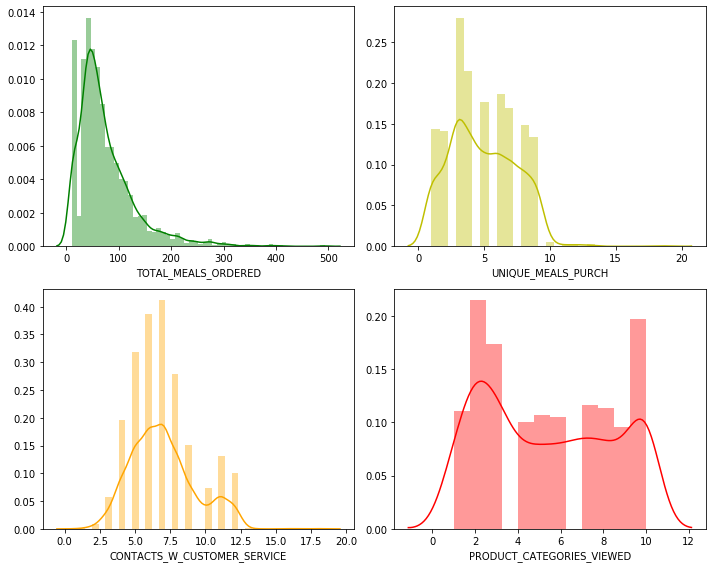

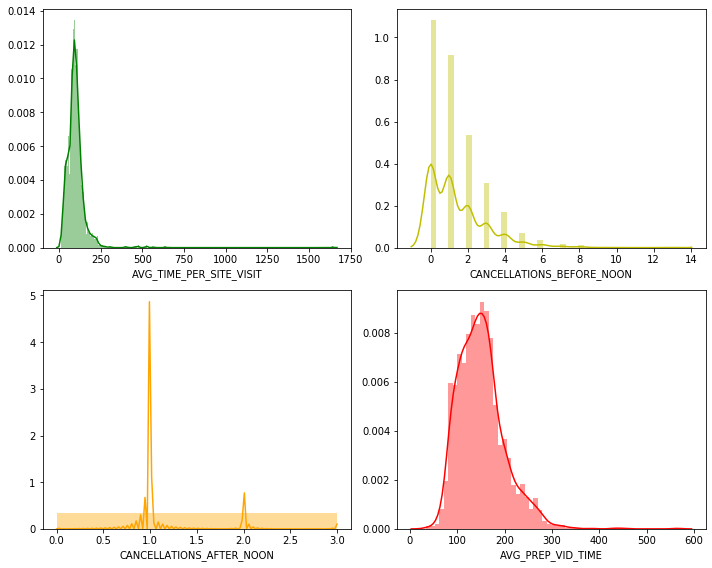

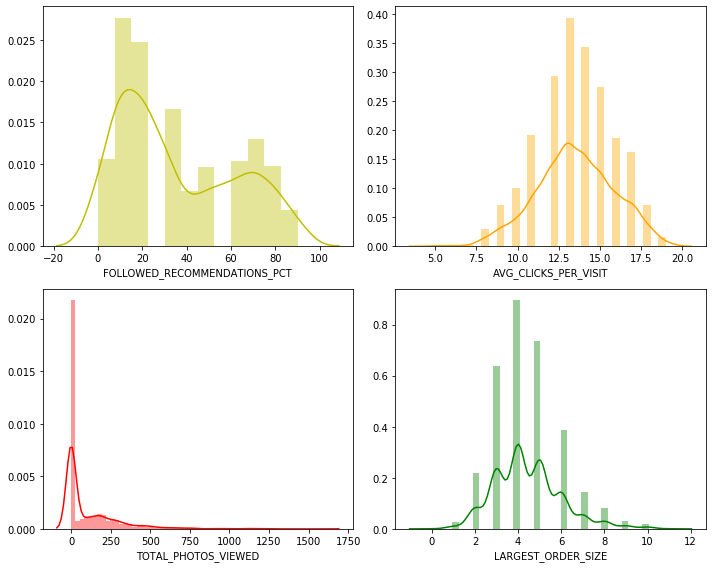

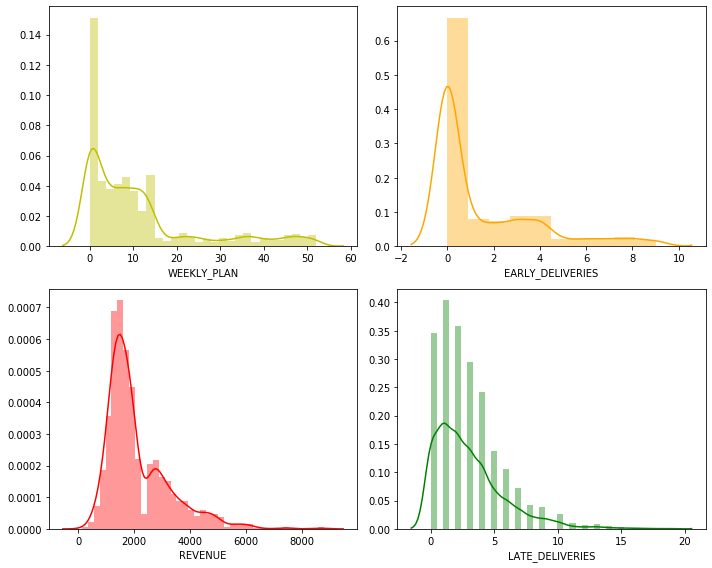

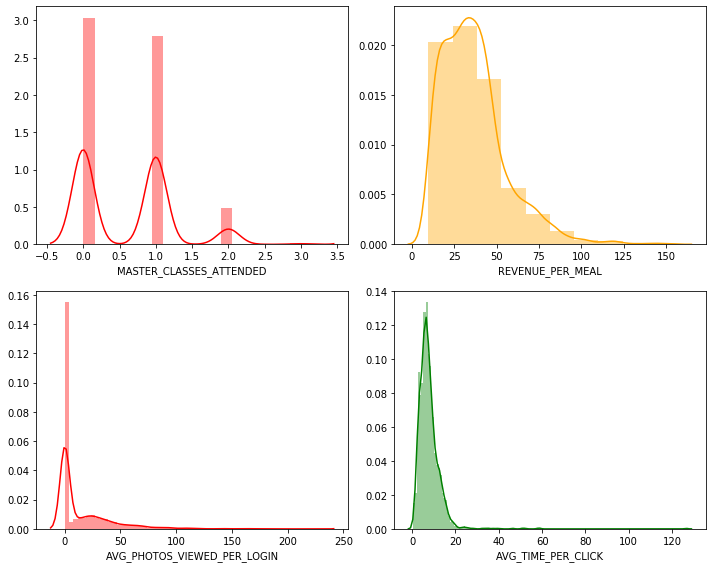

In [203]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.distplot(my_chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 1 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(my_chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 2 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 4)
sns.distplot(my_chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 3 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['EARLY_DELIVERIES'],
             bins = 10,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['REVENUE'],
             bins = 'fd',
             color = 'r')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 4)
sns.distplot(my_chef['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LATE_DELIVERIES')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 4 of 5.png')
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['REVENUE_PER_MEAL'],
             bins = 10,
             color = 'orange')
plt.xlabel('REVENUE_PER_MEAL')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['AVG_PHOTOS_VIEWED_PER_LOGIN'],
             bins = 'fd',
             color = 'r')
plt.xlabel('AVG_PHOTOS_VIEWED_PER_LOGIN')

########################

plt.subplot(2, 2, 4)
sns.distplot(my_chef['AVG_TIME_PER_CLICK'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_TIME_PER_CLICK')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 5 of 5.png')
plt.show()

***
After analyzing the plots, we can start flagging the outliers and develop new features. These will give us a better understanding of the features when we start building a model.

In [204]:
TOTAL_MEALS_ORDERED_HI = 120
UNIQUE_MEALS_PURCH_HI = 7
CONTACTS_W_CUSTOMER_SERVICE_HI = 9
PRODUCT_CATEGORIES_VIEWED_HI = 6
AVG_TIME_PER_SITE_VISIT_HI = 160
CANCELLATIONS_BEFORE_NOON_HI = 4
CANCELLATIONS_BEFORE_NOON_LO = 0
CANCELLATIONS_AFTER_NOON_HI = 2
AVG_PREP_VID_TIME_HI = 230
FOLLOWED_RECOMMENDATIONS_PCT_HI = 40
AVG_CLICKS_PER_VISIT_HI = 16
TOTAL_PHOTOS_VIEWED_LO = 60
LARGEST_ORDER_SIZE_HI = 6
WEEKLY_PLAN_HI = 19
WEEKLY_PLAN_LO = 0
EARLY_DELIVERIES_HI = 5
EARLY_DELIVERIES_LO = 1
LATE_DELIVERIES_HI = 7
MASTER_CLASSES_ATTENDED_HI = 1.5
REVENUE_HI = 2100
REVENUE_PER_MEAL_HI = 50
AVG_TIME_PER_CLICK_HI = 12
AVG_PHOTOS_VIEWED_PER_LOGIN_AT = 0
AVG_PHOTOS_VIEWED_PER_LOGIN_HI = 45


##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
my_chef['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = my_chef.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][my_chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

my_chef['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# UNIQUE_MEALS_PURCH
my_chef['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = my_chef.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][my_chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

my_chef['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
my_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = my_chef.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]

my_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# PRODUCT_CATEGORIES_VIEWED
my_chef['OUT_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = my_chef.loc[0:,'OUT_PRODUCT_CATEGORIES_VIEWED'][my_chef['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]

my_chef['OUT_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_TIME_PER_SITE_VISIT
my_chef['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = my_chef.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][my_chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

my_chef['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_BEFORE_NOON
my_chef['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = my_chef.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][my_chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]
condition_lo = my_chef.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][my_chef['CANCELLATIONS_BEFORE_NOON'] < CANCELLATIONS_BEFORE_NOON_LO]

my_chef['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_chef['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_AFTER_NOON
my_chef['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = my_chef.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][my_chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

my_chef['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_PREP_VID_TIME
my_chef['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi = my_chef.loc[0:,'OUT_AVG_PREP_VID_TIME'][my_chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

my_chef['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# FOLLOWED_RECOMMENDATIONS_PCT
my_chef['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = my_chef.loc[0:,'OUT_FOLLOWED_RECOMMENDATIONS_PCT'][my_chef['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_HI]

my_chef['OUT_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# EARLY_DELIVERIES
my_chef['OUT_EARLY_DELIVERIES'] = 0
condition_hi = my_chef.loc[0:,'OUT_EARLY_DELIVERIES'][my_chef['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]
condition_lo = my_chef.loc[0:,'OUT_EARLY_DELIVERIES'][my_chef['EARLY_DELIVERIES'] < EARLY_DELIVERIES_LO]

my_chef['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_chef['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# AVG_CLICKS_PER_VISIT
my_chef['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = my_chef.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][my_chef['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]

my_chef['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# TOTAL_PHOTOS_VIEWED
my_chef['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = my_chef.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][my_chef['TOTAL_PHOTOS_VIEWED'] < TOTAL_PHOTOS_VIEWED_LO]

my_chef['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LARGEST_ORDER_SIZE
my_chef['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi = my_chef.loc[0:,'OUT_LARGEST_ORDER_SIZE'][my_chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]

my_chef['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# WEEKLY_PLAN
my_chef['OUT_WEEKLY_PLAN'] = 0
condition_hi = my_chef.loc[0:,'OUT_WEEKLY_PLAN'][my_chef['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]
condition_lo = my_chef.loc[0:,'OUT_WEEKLY_PLAN'][my_chef['WEEKLY_PLAN'] < WEEKLY_PLAN_LO]

my_chef['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_chef['OUT_WEEKLY_PLAN'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES
my_chef['OUT_LATE_DELIVERIES'] = 0
condition_hi = my_chef.loc[0:,'OUT_LATE_DELIVERIES'][my_chef['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

my_chef['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# MASTER_CLASSES_ATTENDED
my_chef['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = my_chef.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][my_chef['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

my_chef['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# REVENUE
my_chef['OUT_REVENUE'] = 0
condition_hi = my_chef.loc[0:,'OUT_REVENUE'][my_chef['REVENUE'] > REVENUE_HI]

my_chef['OUT_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# REVENUE_PER_MEAL
my_chef['OUT_REVENUE_PER_MEAL'] = 0
condition_hi = my_chef.loc[0:,'OUT_REVENUE_PER_MEAL'][my_chef['REVENUE_PER_MEAL'] > REVENUE_PER_MEAL_HI]

my_chef['OUT_REVENUE_PER_MEAL'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_TIME_PER_CLICK
my_chef['OUT_AVG_TIME_PER_CLICK'] = 0
condition_hi = my_chef.loc[0:,'OUT_AVG_TIME_PER_CLICK'][my_chef['AVG_TIME_PER_CLICK'] > AVG_TIME_PER_CLICK_HI]

my_chef['OUT_AVG_TIME_PER_CLICK'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_PHOTOS_VIEWED_PER_LOGIN
my_chef['OUT_AVG_PHOTOS_VIEWED_PER_LOGIN'] = 0
condition_hi = my_chef.loc[0:,'OUT_AVG_PHOTOS_VIEWED_PER_LOGIN'][my_chef['AVG_PHOTOS_VIEWED_PER_LOGIN'] > AVG_PHOTOS_VIEWED_PER_LOGIN_HI]
condition_at = my_chef.loc[0:,'OUT_AVG_PHOTOS_VIEWED_PER_LOGIN'][my_chef['AVG_PHOTOS_VIEWED_PER_LOGIN'] == AVG_PHOTOS_VIEWED_PER_LOGIN_AT]

my_chef['OUT_AVG_PHOTOS_VIEWED_PER_LOGIN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
my_chef['OUT_AVG_PHOTOS_VIEWED_PER_LOGIN'].replace(to_replace = condition_at,
                                value      = 1,
                                inplace    = True)



***
Since, <strong>MEDIAN_MEAL_RATING</strong> and <strong>DOMAIN_GROUP</strong> is a categorical features, we can one hot encode <strong>get_dummies</strong>.\
Then, remove the original categorical columns using <strong>drop</strong>. Finally, merge the one hot encoded\
data with the original dataset using <strong>join</strong>.

In [205]:
# one hot encoding categorical variables
ONE_HOT_MEDIAN_MEAL_RATING_1 = pd.get_dummies(my_chef['MEDIAN_MEAL_RATING'])
ONE_HOT_MEDIAN_MEAL_RATING_2 = pd.get_dummies(my_chef['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
my_chef = my_chef.drop('MEDIAN_MEAL_RATING', axis = 1)
my_chef = my_chef.drop('DOMAIN_GROUP', axis = 1)

# joining codings together
my_chef = my_chef.join([ONE_HOT_MEDIAN_MEAL_RATING_1])
my_chef = my_chef.join([ONE_HOT_MEDIAN_MEAL_RATING_2])


***
Once we join the dummies features, we can view them and rename them according to our naming convention (or needs). I have tried to make it uniform across the board.

In [206]:
# Renaming one hot encoded columns
my_chef.columns = ['REVENUE','CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                  'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                  'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES','PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES',
                  'LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER','FOLLOWED_RECOMMENDATIONS_PCT','AVG_PREP_VID_TIME',
                  'LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED','EMAIL_DOMAIN',
                  'REVENUE_PER_MEAL','TOTAL_LOGINS','AVG_TIME_PER_CLICK','AVG_PHOTOS_VIEWED_PER_LOGIN',
                  'OUT_TOTAL_MEALS_ORDERED','OUT_UNIQUE_MEALS_PURCH','OUT_CONTACTS_W_CUSTOMER_SERVICE','OUT_PRODUCT_CATEGORIES_VIEWED',
                  'OUT_AVG_TIME_PER_SITE_VISIT','OUT_CANCELLATIONS_BEFORE_NOON','OUT_CANCELLATIONS_AFTER_NOON','OUT_AVG_PREP_VID_TIME',
                  'OUT_FOLLOWED_RECOMMENDATIONS_PCT','OUT_EARLY_DELIVERIES','OUT_AVG_CLICKS_PER_VISIT','OUT_TOTAL_PHOTOS_VIEWED',
                  'OUT_LARGEST_ORDER_SIZE','OUT_WEEKLY_PLAN','OUT_LATE_DELIVERIES','OUT_MASTER_CLASSES_ATTENDED','OUT_REVENUE',
                  'OUT_REVENUE_PER_MEAL','OUT_AVG_TIME_PER_CLICK','OUT_AVG_PHOTOS_VIEWED_PER_LOGIN','MEDIAN_MEAL_RATING_1',
                  'MEDIAN_MEAL_RATING_2','MEDIAN_MEAL_RATING_3','MEDIAN_MEAL_RATING_4','MEDIAN_MEAL_RATING_5', 'JUNK', 'PERSONAL', 'PROFESSIONAL']

***
<strong>Pearson Correlation</strong>

Let's develop a correlation matrix with data rounded to two decimal places.
(The complete correlation matrix has been analyzed, and instead of data dumping only correlation with some significance to CROSS_SELL_SUCCESS have been selected here).

The correlation clearly shows that customers who follow the recommendation are positively correlated. This implies these customers are highly likely to subscribe to the new Halfway There service.



In [207]:
my_chef_corr = my_chef.corr().round(2)

my_chef_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                  1.00
OUT_FOLLOWED_RECOMMENDATIONS_PCT    0.51
FOLLOWED_RECOMMENDATIONS_PCT        0.46
PROFESSIONAL                        0.19
CANCELLATIONS_BEFORE_NOON           0.16
MOBILE_NUMBER                       0.10
TASTES_AND_PREFERENCES              0.08
REFRIGERATED_LOCKER                 0.07
OUT_CANCELLATIONS_BEFORE_NOON       0.06
PACKAGE_LOCKER                      0.04
MASTER_CLASSES_ATTENDED             0.04
PERSONAL                            0.04
PC_LOGINS                           0.04
CONTACTS_W_CUSTOMER_SERVICE         0.04
OUT_CANCELLATIONS_AFTER_NOON        0.03
MEDIAN_MEAL_RATING_5                0.03
OUT_CONTACTS_W_CUSTOMER_SERVICE     0.03
AVG_PREP_VID_TIME                   0.03
EARLY_DELIVERIES                    0.02
LARGEST_ORDER_SIZE                  0.02
MEDIAN_MEAL_RATING_4                0.02
OUT_AVG_PREP_VID_TIME               0.02
OUT_LATE_DELIVERIES                 0.02
OUT_EARLY_DELIVERIES                0.02
AVG_TIME_PER_CLI

***
After feature engineering, we can save the data by creating new file. It will reduce the processing time significantly if we import the feature engineered file directly to run the model.

In [208]:
# saving feature-rich dataset in Excel
my_chef.to_excel('my_chef_feature_classification.xlsx',
                 index = False)

***
<h3>Predictive Model (Classification) using Scikit-learn</h3>



***
After building stats model, analyzing their p-value and taking into consideration of the correlation values, we determined which features have lower p-value and are significant.

We can select those significant features and create a dictionary. Creating a dictionary helps us do soft coding, in case we need to add or remove features we can simply edit the dictionary and it changes in every model.



In [209]:
# creating a dictionary to store features

Feature_dict = {
    
 # significant variables only
 'sig_var'    : ['MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS',
                   'OUT_AVG_CLICKS_PER_VISIT','OUT_TOTAL_PHOTOS_VIEWED', 'PROFESSIONAL','JUNK','OUT_AVG_PHOTOS_VIEWED_PER_LOGIN']
}

***
Let's create the explanatory variables using features mentioned in dictionary and revenue as response variable.

Let's split the data into 75% train and 25% test to build the model and test against unseen data to get more realistic predictive accuracy.

Since, it is a classification problem its important to stratify because it is necessary to understand whether the balance of the response variable is balanced.

In [210]:
# creating explanatory variables
my_chef_data   = my_chef.loc[ : , Feature_dict['sig_var']]

# preparing response variable
my_chef_target = my_chef.loc[:,'CROSS_SELL_SUCCESS']


# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
                                    my_chef_data,
                                    my_chef_target,
                                    test_size = 0.25,
                                    random_state = 222,
                                    stratify = my_chef_target)


***
After experimenting with KNN, logistic model, CART, Random forest and Gradient Boosting. I found that i got better AUC score with the Gradient Boosting model. So, I'm choosing GradientBoostingClassifier as my final model. We know that this model works better with the standardized dataset so let's standardize our explanatory variable.

Once we have a standardized data, we have to train-test split again before we build the model.

In [211]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(my_chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(my_chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            my_chef_target,
            random_state = 222,
            test_size = 0.25,
            stratify = my_chef_target)


***
Our model performs better if we optimize our hyperparameters. In the interest of saving processing time, its not displayed here but i have ran the grid search to determine the best hyperparameters to use in the model. I did see the improvement in AUC score before hyperparameter tuning and after. The model below is tuned to produce optimal results.

Eventhough we see there is a difference between training accuracy and testing accuracy, it is acceptable because difference is around 0.04 which not statistically significant.

In [212]:
# INSTANTIATING the model object with hyperparameters
gbm_classifier = GradientBoostingClassifier(loss = 'deviance',
                                              learning_rate = 0.3,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_classifier_fit = gbm_classifier.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
gbm_classifier_pred = gbm_classifier_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', gbm_classifier_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing ACCURACY :', gbm_classifier_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = gbm_classifier_pred).round(4))


Training ACCURACY: 0.7615
Testing ACCURACY : 0.7228
AUC Score        : 0.6351


***
Let's create a confusion matrix which is better than accuracy because here we can calculate the specificity and precision, which are much better metrics than accuracy. This will help us see the number of True positives, True negatives etc.

In [213]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = gbm_classifier_pred))

[[ 61  95]
 [ 40 291]]


***
Let's create a user defined function which help us plot the important features in our dataset to make decision according our final model.

In [214]:
########################################
# plot_feature_importances
########################################
def important_features(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

***
Here, we can see that these feature depend on the correlation and these features are important when predicting whether the customer will buy our new service or not. Here, I didn't consider the standardized data for the plot.

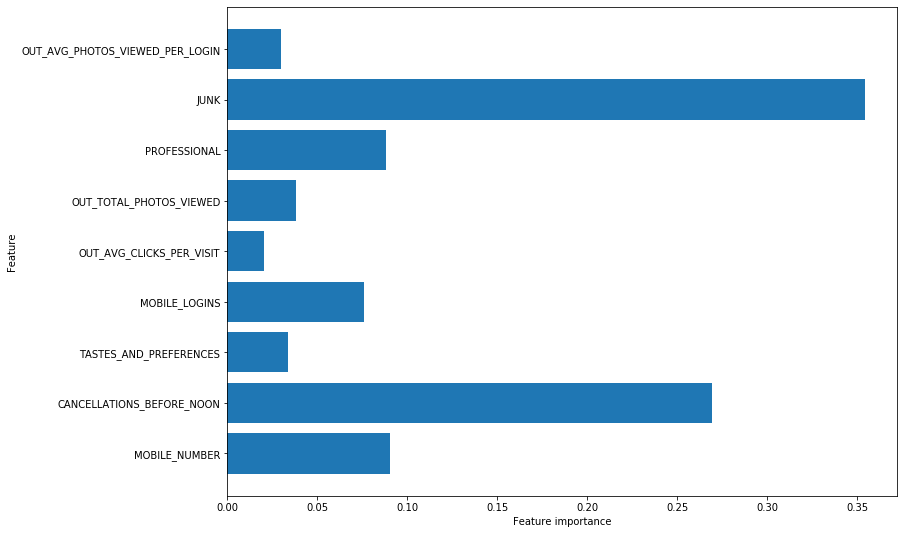

In [215]:
# plotting feature importance
important_features(gbm_classifier_fit,
                         train = X_train,
                         export = False)

***
<h3><strong>Final Model: Gradient Boosting</strong></h3>

When compared with other models, Gradient Boosting gave the better AUC score and non-statistically significant diferrence between training score and testing score. 

<strong>test_score: 0.723</strong>

<strong>AUC_score: 0.635</strong>